# Extra plots of probability

Here we'll compare with some more data points. 

---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Change default colour scheme:
plt.style.use('seaborn-colorblind')

---

Import the data:

### Get errors from Emberson's CI, assuming log odds = 0 at T_0

Calculate a new distribution at time=0 using the known $\pm$ values on the odds ratio at time T=1hr for mRS$\leq$1. OR was 1.9. 

Then follow this through to each of the other mRS distributions - use the scaling of the high and low t=0 mRS$\leq$1 points in the same way as before.

---

In [49]:
def get_dist_0(dist_0,p2,OR,mRS_ref,T_0= 6.3*60):
    """Combine two functions from earlier."""
    p1 = get_p1(p2, OR, mRS_ref, T_0)
    dist_0_oly,bins_0_oly = get_scaled_dist(dist_0,p1,mRS_ref)
    return dist_0_oly,bins_0_oly 

In [ ]:
OR = 1.9
OR_low = 1.4
OR_hi = 2.6

mRS_ref = 1

# p2 from distribution if not treated
# (index+1 because bins_F_oly contains 0.0 at start)
p2 = bins_F_oly[mRS_ref+1]

In [50]:
d_low,_ = get_dist_0(dist_0,p2,OR_low,mRS_ref)
d_hi,_  = get_dist_0(dist_0,p2,OR_hi, mRS_ref)

#### Lower limit 

In [51]:
p1 = np.log(np.cumsum(d_low)[:-1])
p2 = np.log(1 - np.cumsum(d_low)[:-1])
p3 = np.log(F_oly[:-1])
p4 = np.log(1 - F_oly[:-1])

a_low = p1-p2 - p3+p4

In [52]:
b_low = -a_low/(6.3*60)

In [53]:
A_low = a_low+p3-p4

#### Upper limit 

In [54]:
p1 = np.log(np.cumsum(d_hi)[:-1])
p2 = np.log(1 - np.cumsum(d_hi)[:-1])
p3 = np.log(F_oly[:-1])
p4 = np.log(1 - F_oly[:-1])

a_hi = p1-p2 - p3+p4

In [55]:
b_hi = -a_hi/(6.3*60)

In [56]:
A_hi = a_hi+p3-p4

### Plot P as function of time 

n.b. no errors for mRS=5yet so just plotted the base line:

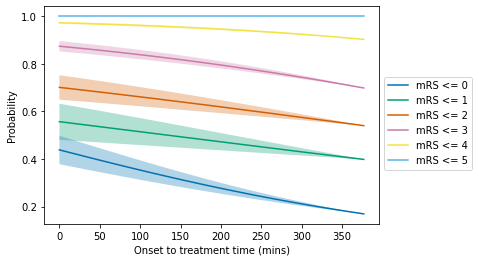

In [57]:
t = np.arange(0,6.3*60)

for i,A_i in enumerate(A_oly):
    
    p_i   = np.exp(A_i      + b_oly[i]*t) / (1+np.exp(A_i      + b_oly[i]*t))
    p_low = np.exp(A_low[i] + b_low[i]*t) / (1+np.exp(A_low[i] + b_low[i]*t))
    p_hi  = np.exp(A_hi[i]  + b_hi[i]*t ) / (1+np.exp(A_hi[i]  + b_hi[i]*t) )
    
    plt.plot(t, p_i, '-', label = f'mRS <= {i}')
    
    plt.fill_between(t, p_low, p_hi, alpha=0.3)

    
plt.plot(t, [1.0 for x in t], '-', label = 'mRS <= 5')

plt.legend(loc='best',bbox_to_anchor=[1.0,0.5,0.2,0.2])

plt.ylabel('Probability')

plt.xlabel('Onset to treatment time (mins)')

plt.show()

---

### Plot treated 'intervention' population:

Add in Goyal+2016 Figure 1B treated 'intervention' population:

In [17]:
# Probabilities for the treated 'intervention' population:
p_treated = np.array([0.100, 0.169, 0.191, 0.169, 0.156, 0.062])#, 0.153])

# Margin of error calculation:
z = 1.96
n = 633
errs = []

# Print the n*p and n*(1-p) values to check they are above 10.0,
# else this error method is invalid.
for i,p in enumerate(p_treated):
    err = p * z * np.sqrt(p*(1.0-p)/n)    
    errs.append(p*err)

    if n*p<10.0 or n*(1-p)<10.0:
        # Print the n*p and n*(1-p) values to check they are above 10.0,
        # else this error method is invalid.
        print('mRS \t n*p \t n*(1-p)')
        print(i, '\t', round(n*p,1), '\t', round(n*(1-p),1))
    
# Cumulative probability of treated population:    
cp_t = np.cumsum(p_treated)
# Normalise because excluding mRS=6:
cp_t = cp_t/cp_t[-1]

Plot the data:

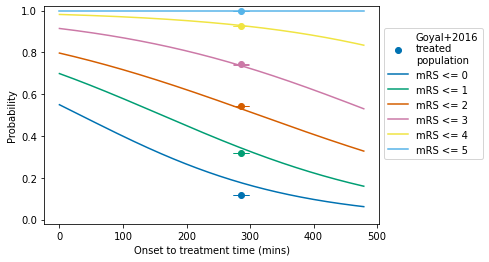

In [18]:
t = np.arange(0,8*60)


for i,p in enumerate(cp_t):
    # Scatter the Goyal+2016 Figure 1B treated 'intervention' population:
    cpt_lab = 'Goyal+2016\ntreated\npopulation' if i==0 else None
    s = plt.scatter(285, p, label=cpt_lab)
    # y-errorbar calculated in previous cell.
    # x-errorbar from paper, Table 1 "onset to reperfusion".
    plt.errorbar(285,p,
                 yerr=errs[i], 
                 # xerr=np.array([[285-210],[362-285]]), 
                 color=s.get_facecolors(), capsize=8)

# Plot lines as before:
plot_probs(A_ect,b_ect,t,bins_0,bins_F_ect,colour_bins=0,mark_data_ect=0)

plt.show()

# # Use tight_layout() to make sure the legend isn't cut off when image is saved:
# plt.tight_layout()
# plt.savefig('thromb_goyal-treated-population_v2.pdf')
# plt.close()

### Include treated population 


ARE THESE THE WRONG DATA?

From Lees+2020. As for the $t=T_0$ case, these values are measured from the image using a ruler on Powerpoint and so the number of patients are not integers. The probabilities will be close enough. 

In [43]:
# Treated population (Lees+2010):
# Numbers of patients in the four bars: 161, 303, 809, 576.
n_0 = np.array([ 36.10661765,  31.10825163,  12.89052288,  21.44035948,  21.76919935,   6.77410131,  30.91094771])
n_1 = np.array([ 52.23284314,  74.01715686,  22.27941176,  40.10294118,  35.77083333,  25.12622549,  53.47058824])
n_2 = np.array([190.68341503, 171.84640523, 105.75163399,  83.94035948,  95.17647059,  73.69566993,  87.90604575])
n_3 = np.array([103.29411765, 113.17647059,  67.76470588,  64.94117647,  85.88235294,  56.,          84.94117647])


# # Combine the four datasets and create probability distribution:
# n_t_oly = np.sum([n_0,n_1,n_2,n_3],axis=0)
# # Remove mRS=6 with [:-1]:
# dist_t_oly = n_t_oly[:-1] / np.sum(n_t_oly[:-1])

# # Create cumulative probability:
# bins_t_oly = np.cumsum(np.concatenate(([0.0],dist_t_oly)))

Calculate margin of error associated with the data:

In [44]:
# Number of patients from above:
ns = [n_0,n_1,n_2,n_3]
# Average treatment time for each population:
nts = [45.0,135.0,225.0,315]
# Store binned prob dists and errors in these lists:
bns = []
ens = []

for j,n in enumerate(ns):
    # Convert number distribution to probability:
    # Remove mRS=6 with [:-1]:
    d_n = n[:-1] / np.sum(n[:-1])
    
    
    # Margin of error calculation:
    z = 1.96
    n = np.sum(n[:-1])
    errs = []
    for i,p in enumerate(d_n):
        err = p * z * np.sqrt(p*(1.0-p)/n)
        errs.append(p*err)
        if n*p<10.0 or n*(1-p)<10.0:
            # Print the n*p and n*(1-p) values to check they are above 10.0,
            # else this error method is invalid.
            print('time \t mRS \t n*p \t n*(1-p)')
            print(nts[j], '\t', i, '\t', round(n*p,1), '\t', round(n*(1-p),1))
    ens.append(errs)

    # Create cumulative probability:
    b_n = np.cumsum(d_n)
    bns.append(b_n)

# Transpose for easier plotting:
bns = np.transpose(np.array(bns))
ens = np.transpose(np.array(ens))

time 	 mRS 	 n*p 	 n*(1-p)
45.0 	 5 	 6.8 	 123.3


Plot data as scatter with errorbars:

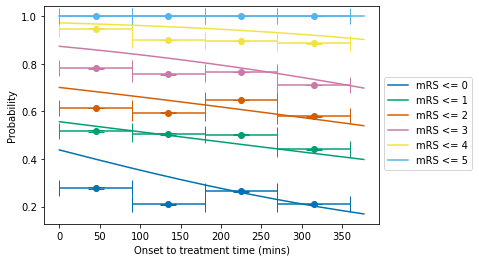

In [45]:
t = np.arange(0,6.3*60)
    
plot_mRS5=1
if plot_mRS5>0:
    A_oly_plot = np.append(A_oly,[0.0])
    
for i,A_i in enumerate(A_oly_plot):
    if i<5:
        p_i = np.exp(A_i + b_oly[i]*t)/(1+np.exp(A_i + b_oly[i]*t))
    else:
        p_i = [1.0 for x in t]
    l,=plt.plot(t, p_i, '-', label = f'mRS <= {i}')
    colour = l.get_color()
    
    # Scatter the treated patient population at the given times (Lees+2010):
    plt.errorbar(nts,bns[i,:],yerr=ens[i,:],xerr=45,fmt='o',color=colour,capsize=8)
     
plt.legend(loc='upper left', bbox_to_anchor=[1.0,0.5,0.2,0.2])

plt.ylabel('Probability')

plt.xlabel('Onset to treatment time (mins)')

plt.show()